<a href="https://colab.research.google.com/github/juliananemezio/top100-amazon-books/blob/main/Amazon_Books_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e Visualização de Dados: Top 100 Bestselling Book Reviews on Amazon**

Olá :)

Esse é um projeto pessoal de análise e visualização de dados. O dataset escolhido foi **Top 100 Bestselling Book Reviews on Amazon** disponível no Kaggle (https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews).

## **Lendo o Banco de Dados**

**Importando Bibliotecas**

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
#Lendo o arquivo
dados = pd.read_csv("Top-100_Books.csv")
dados.head(10)

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
5,6,"Fourth Wing (The Empyrean, 1)",16.99,4.8,Rebecca Yarros,2023,Fantasy,amazon.com/Fourth-Wing-Empyrean-Rebecca-Yarros...
6,7,Unwoke: How to Defeat Cultural Marxism in America,27.43,4.3,Unknown,2023,"Nonfiction, Politics",amazon.com/Unwoke-Defeat-Cultural-Marxism-Amer...
7,8,No Brainer (Diary of a Wimpy Kid Book 18),8.55,4.8,Jeff Kinney,2023,"Humor, Middle Grade",amazon.com/Brainer-Diary-Wimpy-Kid-Book/dp/141...
8,9,Killers of the Flower Moon: The Osage Murders ...,9.86,4.4,David Grann,2017,"Nonfiction, True Crime",amazon.com/Killers-Flower-Moon-Osage-Murders/d...
9,10,All the Light We Cannot See: A Novel,11.98,4.5,Anthony Doerr,2014,Historical Fiction,amazon.com/All-Light-We-Cannot-See/dp/15011732...


In [74]:
#Passando para o português
dados.columns = ["Ranking", "Titulo", "Preco", "Nota", "Autor", "Ano de Publicacão", "Genero", "Link"]
dados.head()

,Ranking,Titulo,Preco,Nota,Autor,Ano de Publicacão,Genero,Link
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


## **Preço Médio dos Livros**

<Axes: ylabel='Frequency'>

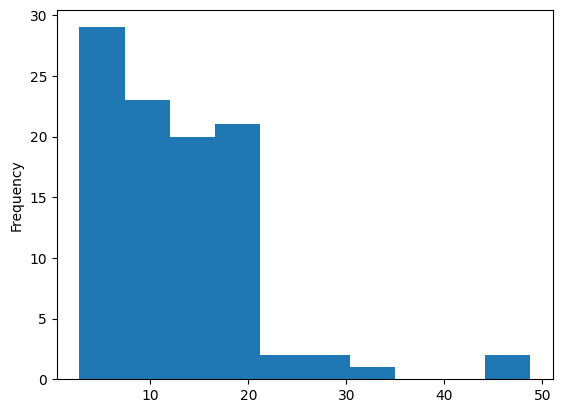

In [75]:
dados.Preco.plot(kind='hist')

<Axes: ylabel='Preco'>

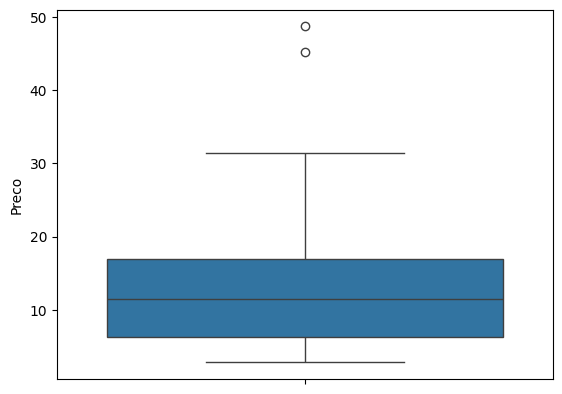

In [76]:
sns.boxplot(dados.Preco)

In [77]:
preco_medio = dados['Preco'].mean()
print("O preço médio dos livros é:", preco_medio)

O preço médio dos livros é: 12.7086


## **Gênero Mais Lido**

In [78]:
dados['Genero'].value_counts()

Nonfiction                                  6
Childrens, literature                       5
Childrens                                   4
Memoir                                      3
Fantasy                                     3
                                           ..
Thriller, mystery, suspense                 1
Spirituality, self-help, personal growth    1
Picture Book                                1
Picture Book, Colors, Wild Animals          1
Childrens, Picture Books                    1
Name: Genero, Length: 79, dtype: int64

In [79]:
contagem_genero = dados['Genero'].value_counts()
genero_mais_lido = contagem_genero.idxmax()
contagem_mais_lida = contagem_genero.max()

print("O gênero mais lido é:", genero_mais_lido)
print("Com um total de", contagem_mais_lida, "livros.")

O gênero mais lido é: Nonfiction
Com um total de 6 livros.


In [80]:
nota_media_nonfiction = dados[dados['Genero'] == 'Nonfiction']['Nota'].mean()
print("A nota média dos livros de não-ficção é:", nota_media_nonfiction)

A nota média dos livros de não-ficção é: 4.666666666666667


<ipython-input-81-ae7fcc793c77>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


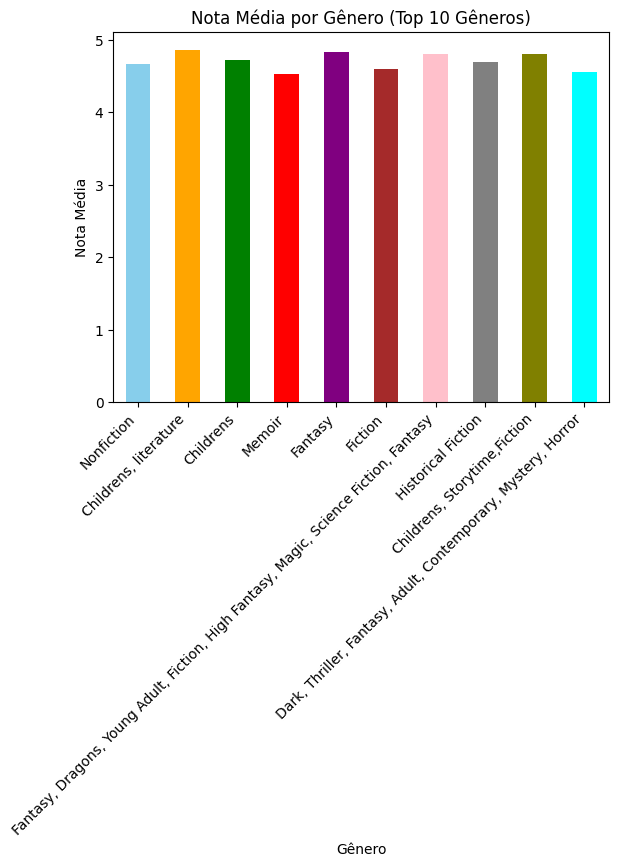

In [81]:
# Obtendo os 10 gêneros mais frequentes
top_10_generos = contagem_genero.head(10).index

# Calculando a nota média de cada gênero
nota_media_por_genero = dados.groupby('Genero')['Nota'].mean().loc[top_10_generos]

# Definindo cores para cada gênero
cores = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Criando um gráfico de barras da nota média por gênero com cores diferentes para cada barra
nota_media_por_genero.plot(kind='bar', color=cores)

# Adicionando rótulos e título
plt.xlabel('Gênero')
plt.ylabel('Nota Média')
plt.title('Nota Média por Gênero (Top 10 Gêneros)')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Notas dos Livros**

In [82]:
# Calculando estatísticas descritivas das notas dos livros
estatisticas_notas = dados['Nota'].describe()

print(estatisticas_notas)

count    97.000000
mean      4.689691
std       0.181133
min       4.100000
25%       4.600000
50%       4.700000
75%       4.800000
max       5.000000
Name: Nota, dtype: float64


In [83]:
dados['Nota'].value_counts()

4.8    27
4.6    19
4.7    17
4.9    16
4.5     8
4.4     4
4.1     2
4.3     2
5.0     1
4.2     1
Name: Nota, dtype: int64

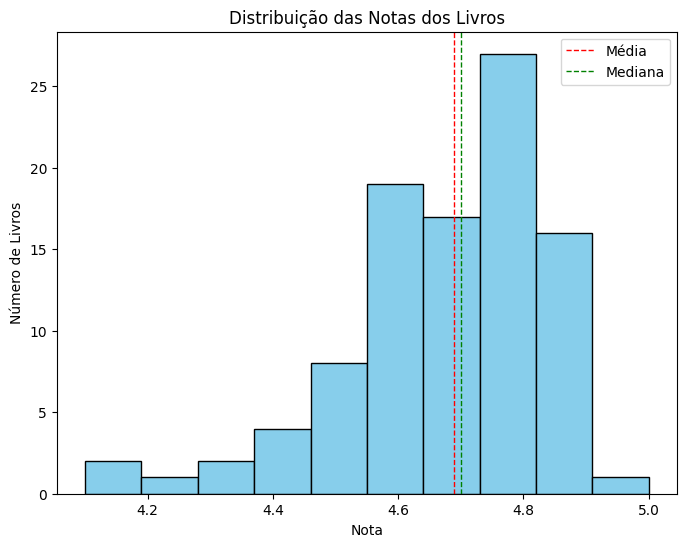

In [84]:
# Criando um histograma da distribuição das notas
plt.figure(figsize=(8, 6))
plt.hist(dados['Nota'], bins=10, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Nota')
plt.ylabel('Número de Livros')
plt.title('Distribuição das Notas dos Livros')

# Adicionando linhas verticais para representar a média e a mediana
plt.axvline(x=estatisticas_notas['mean'], color='red', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(x=estatisticas_notas['50%'], color='green', linestyle='dashed', linewidth=1, label='Mediana')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()

**Correlação entre notas e preços:** A correlação é uma medida estatística que indica a força e a direção de uma relação linear entre duas variáveis. Se a correlação for positiva, isso significa que as duas variáveis tendem a aumentar juntas. Se for negativa, isso significa que uma variável tende a aumentar enquanto a outra diminui.

In [85]:
# Calculando a correlação entre as notas dos livros e os preços
correlacao_notas_preco = dados['Nota'].corr(dados['Preco'])

print("A correlação entre as notas dos livros e os preços é:", correlacao_notas_preco)

A correlação entre as notas dos livros e os preços é: -0.2858160554771369


A correlação entre as notas e os preços dos livros é **-0.286**, o que indica uma **correlação negativa** fraca entre essas duas variáveis. Isso sugere, portanto, que, em geral, não há uma relação linear forte entre o preço de um livro e a nota que ele recebe dos leitores. Contudo, é importante lembrar que a correlação não captura necessariamente todas as nuances e complexidades da relação entre as variáveis.

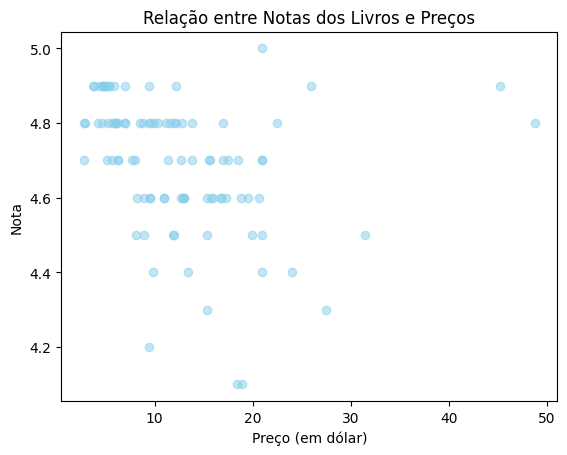

In [86]:
# Criando um gráfico de dispersão das notas dos livros em relação aos preços
#plt.figure(figsize=(8, 6))
plt.scatter(dados['Preco'], dados['Nota'], color='skyblue', alpha=0.5)

# Adicionando rótulos e título
plt.xlabel('Preço (em dólar)')
plt.ylabel('Nota')
plt.title('Relação entre Notas dos Livros e Preços')

# Exibindo o gráfico
plt.show()

## **Autores Mais Populares**

In [87]:
contagem_autores = dados['Autor'].value_counts()
contagem_autores

Sarah J. Maas          5
Adam Wallace           3
Rebecca Yarros         2
Suzanne Collins        2
Lucy Score             2
                      ..
David Brooks           1
Don Miguel Ruiz        1
Melissa Sweet          1
Christopher Paolini    1
Craig Smith            1
Name: Autor, Length: 85, dtype: int64

In [88]:
nota_media_por_autor = dados.groupby('Autor')['Nota'].mean()
nota_media_por_autor

Autor
 Penguin Young Readers Licenses (    4.8
 Scholastic                          4.8
 Wendy Loggia                        4.9
Abraham Verghese                     4.6
Adam M. Grant                        4.4
                                    ... 
Unknown                              4.3
Walter Isaacson                      4.7
Wendi Silvano                        4.8
Workman Publishing                   4.8
duopress labs, Julissa Mora          4.9
Name: Nota, Length: 85, dtype: float64

<ipython-input-89-ef27196bfa10>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_autores.index, y=top_10_autores.values, palette=cores_degrade_rosa)


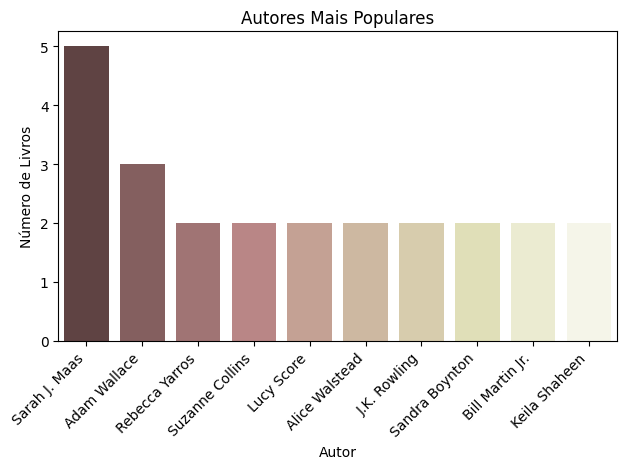

In [89]:
# Contando a frequência de cada autor
contagem_autores = dados['Autor'].value_counts()

# Ordenando os autores pelo número de livros em ordem decrescente
top_10_autores = contagem_autores.head(10).sort_values(ascending=False)

# Criando uma paleta de cores degradê em tons de rosa
cores_degrade_rosa = sns.color_palette('pink', n_colors=len(top_10_autores))

# Criando um gráfico de barras com cores degradê em tons de rosa
sns.barplot(x=top_10_autores.index, y=top_10_autores.values, palette=cores_degrade_rosa)

# Adicionando rótulos e título
plt.xlabel('Autor')
plt.ylabel('Número de Livros')
plt.title('Autores Mais Populares')

# Exibindo o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## **Ano de Publicação**

In [90]:
contagem_anos = dados['Ano de Publicacão'].value_counts()
contagem_anos

2023    28
2022     8
2018     8
2021     6
2017     5
2020     5
2016     5
2015     5
2014     4
2019     3
1967     2
1997     2
2011     2
2009     2
1980     1
2010     1
1982     1
1999     1
2005     1
2008     1
2024     1
1994     1
2013     1
1960     1
1989     1
1947     1
1998     1
1969     1
1987     1
Name: Ano de Publicacão, dtype: int64

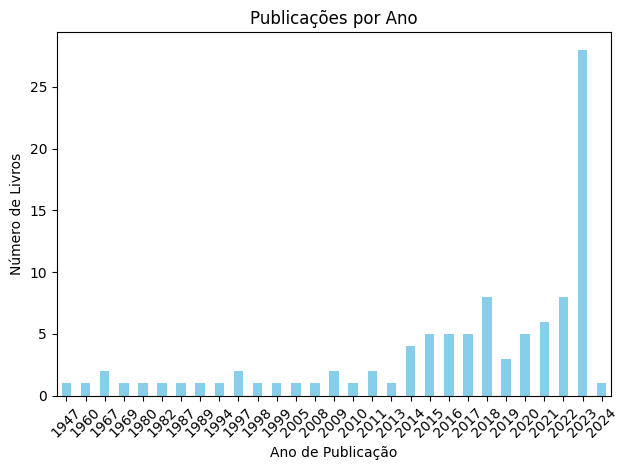

In [91]:
# Ordenando os anos em ordem crescente
contagem_anos = contagem_anos.sort_index()

# Criando um gráfico de barras da contagem de publicações por ano
contagem_anos.plot(kind='bar', color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Livros')
plt.title('Publicações por Ano')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()